In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import squarify
import plotly.graph_objs as go
import plotly.offline as pyoff
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
from sklearn.preprocessing  import OneHotEncoder
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.feature_selection import RFE


In [ ]:
data=pd.read_csv("Customer-Churn-Records (1).csv")

In [ ]:
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

In [ ]:
target_var=data['Exited']
target_var

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
target_var.value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

In [ ]:
data.shape

(10000, 18)

In [ ]:
data.isnull().any()

RowNumber             False
CustomerId            False
Surname               False
CreditScore           False
Geography             False
Gender                False
Age                   False
Tenure                False
Balance               False
NumOfProducts         False
HasCrCard             False
IsActiveMember        False
EstimatedSalary       False
Exited                False
Complain              False
Satisfaction Score    False
Card Type             False
Point Earned          False
dtype: bool

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
data.describe(include='all')

RowNumber    CustomerId Surname   CreditScore Geography Gender  \
count   10000.00000  1.000000e+04   10000  10000.000000     10000  10000   
unique          NaN           NaN    2932           NaN         3      2   
top             NaN           NaN   Smith           NaN    France   Male   
freq            NaN           NaN      32           NaN      5014   5457   
mean     5000.50000  1.569094e+07     NaN    650.528800       NaN    NaN   
std      2886.89568  7.193619e+04     NaN     96.653299       NaN    NaN   
min         1.00000  1.556570e+07     NaN    350.000000       NaN    NaN   
25%      2500.75000  1.562853e+07     NaN    584.000000       NaN    NaN   
50%      5000.50000  1.569074e+07     NaN    652.000000       NaN    NaN   
75%      7500.25000  1.575323e+07     NaN    718.000000       NaN    NaN   
max     10000.00000  1.581569e+07     NaN    850.000000       NaN    NaN   

                 Age        Tenure        Balance  NumOfProducts    HasCrCard  \
count   10000.000000  10000.000000   10000.000000   10000.000000  10000.00000   
unique           NaN           NaN            NaN            NaN          NaN   
top              NaN           NaN            NaN            NaN          NaN   
freq             NaN           NaN            NaN            NaN          NaN   
mean       38.921800      5.012800   76485.889288       1.530200      0.70550   
std        10.487806      2.892174   62397.405202       0.581654      0.45584   
min        18.000000      0.000000       0.000000       1.000000      0.00000   
25%        32.000000      3.000000       0.000000       1.000000      0.00000   
50%        37.000000      5.000000   97198.540000       1.000000      1.00000   
75%        44.000000      7.000000  127644.240000       2.000000      1.00000   
max        92.000000     10.000000  250898.090000       4.000000      1.00000   

        IsActiveMember  EstimatedSalary        Exited      Complain  \
count     10000.000000     10000.000000  10000.000000  10000.000000   
unique             NaN              NaN           NaN           NaN   
top                NaN              NaN           NaN           NaN   
freq               NaN              NaN           NaN           NaN   
mean          0.515100    100090.239881      0.203800      0.204400   
std           0.499797     57510.492818      0.402842      0.403283   
min           0.000000        11.580000      0.000000      0.000000   
25%           0.000000     51002.110000      0.000000      0.000000   
50%           1.000000    100193.915000      0.000000      0.000000   
75%           1.000000    149388.247500      0.000000      0.000000   
max           1.000000    199992.480000      1.000000      1.000000   

        Satisfaction Score Card Type  Point Earned  
count         10000.000000     10000  10000.000000  
unique                 NaN         4           NaN  
top                    NaN   DIAMOND           NaN  
freq                   NaN      2507           NaN  
mean              3.013800       NaN    606.515100  
std               1.405919       NaN    225.924839  
min               1.000000       NaN    119.000000  
25%               2.000000       NaN    410.000000  
50%               3.000000       NaN    605.000000  
75%               4.000000       NaN    801.000000  
max               5.000000       NaN   1000.000000

In [ ]:
# as the target variable is numerical and has no null values no imputations require removing the target from

In [ ]:
col_name=data.columns

In [ ]:
col_name

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

## unique values of each column


In [ ]:
for i in data.columns:
    print ("number of unique :{}\n{}\n uniquevalues \n{}".format(i,data[i].nunique(),data[i].unique()))
    print ("---------------------- \n")




number of unique :RowNumber
10000
 uniquevalues 
[    1     2     3 ...  9998  9999 10000]
---------------------- 

number of unique :CustomerId
10000
 uniquevalues 
[15634602 15647311 15619304 ... 15584532 15682355 15628319]
---------------------- 

number of unique :Surname
2932
 uniquevalues 
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
---------------------- 

number of unique :CreditScore
460
 uniquevalues 
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 

## as RowNumber and customer id are unique values dosnt make matter they stay in eda or not because any corelation cannot be forud  

In [ ]:
# removing those 2  columns
unq=data[['RowNumber','CustomerId']]
data=data.drop(['RowNumber','CustomerId'], axis =1)

## UNIVAREINT ANALASYS

In [ ]:
temp=target_var.value_counts()
dicti =['NOT Exited','Exited' ]
temp =temp.set_index(dicti, inplace=True)


AttributeError: 'Series' object has no attribute 'set_index'

In [ ]:
trace = go.Bar(x=['not Exited','Exited'],
               y= temp.values,
               text = temp.values,
               textposition = 'inside',
               name = 'Exited')
ploting  = [trace]
layout = go.Layout(
    autosize=False,
    width=600,
    height=400,title = "Exited Distribution"

)

fig = go.Figure(data=ploting, layout=layout)
iplot(fig)

In [ ]:
data_cat=data.select_dtypes(include=['object','category'])
data_num=data.select_dtypes(exclude=['object'])

In [ ]:
for i in data_num.columns:
          if data_num[i].nunique()<15:
            data_cat[i]= data_num[i]
            data_num=data_num.drop(i,axis=1)


In [ ]:
data_num.columns

Index(['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned'], dtype='object')

In [ ]:
data_cat.columns


Index(['Surname', 'Geography', 'Gender', 'Card Type', 'Tenure',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain',
       'Satisfaction Score'],
      dtype='object')

 ## catagorical varibles we plot bar and pie plot if unique values are less than 5 then pie looks better

In [ ]:
temp=data['Surname'].value_counts()
temp.index


Index(['Smith', 'Scott', 'Martin', 'Walker', 'Brown', 'Yeh', 'Shih',
       'Genovese', 'Maclean', 'Wright',
       ...
       'Odell', 'Real', 'Fishbourne', 'McIver', 'Valentin', 'Izmailov', 'Bold',
       'Bonham', 'Poninski', 'Burbidge'],
      dtype='object', length=2932)

In [ ]:
trace = go.Bar(x=temp.index,
               y= temp.values,
               text = temp.values,
               textposition = 'inside',
               name = 'surname')
ploting  = [trace]
layout = go.Layout(
    autosize=False,
    width=600,
    height=600,title = "surname Distribution"
)

fig = go.Figure(data=ploting, layout=layout)
iplot(fig)

In [ ]:
def cataplot(x):
      for i in x:
        order = data[i].value_counts().sort_values(ascending = False).index
        plt.figure(figsize = (12, 6), dpi = 200)
        sns.countplot(x = i, data = data, order = order, palette = 'cool_r')
        plt.title('Customers wrt {}'.format(i))
        plt.show()
# dpi = "dots per inch

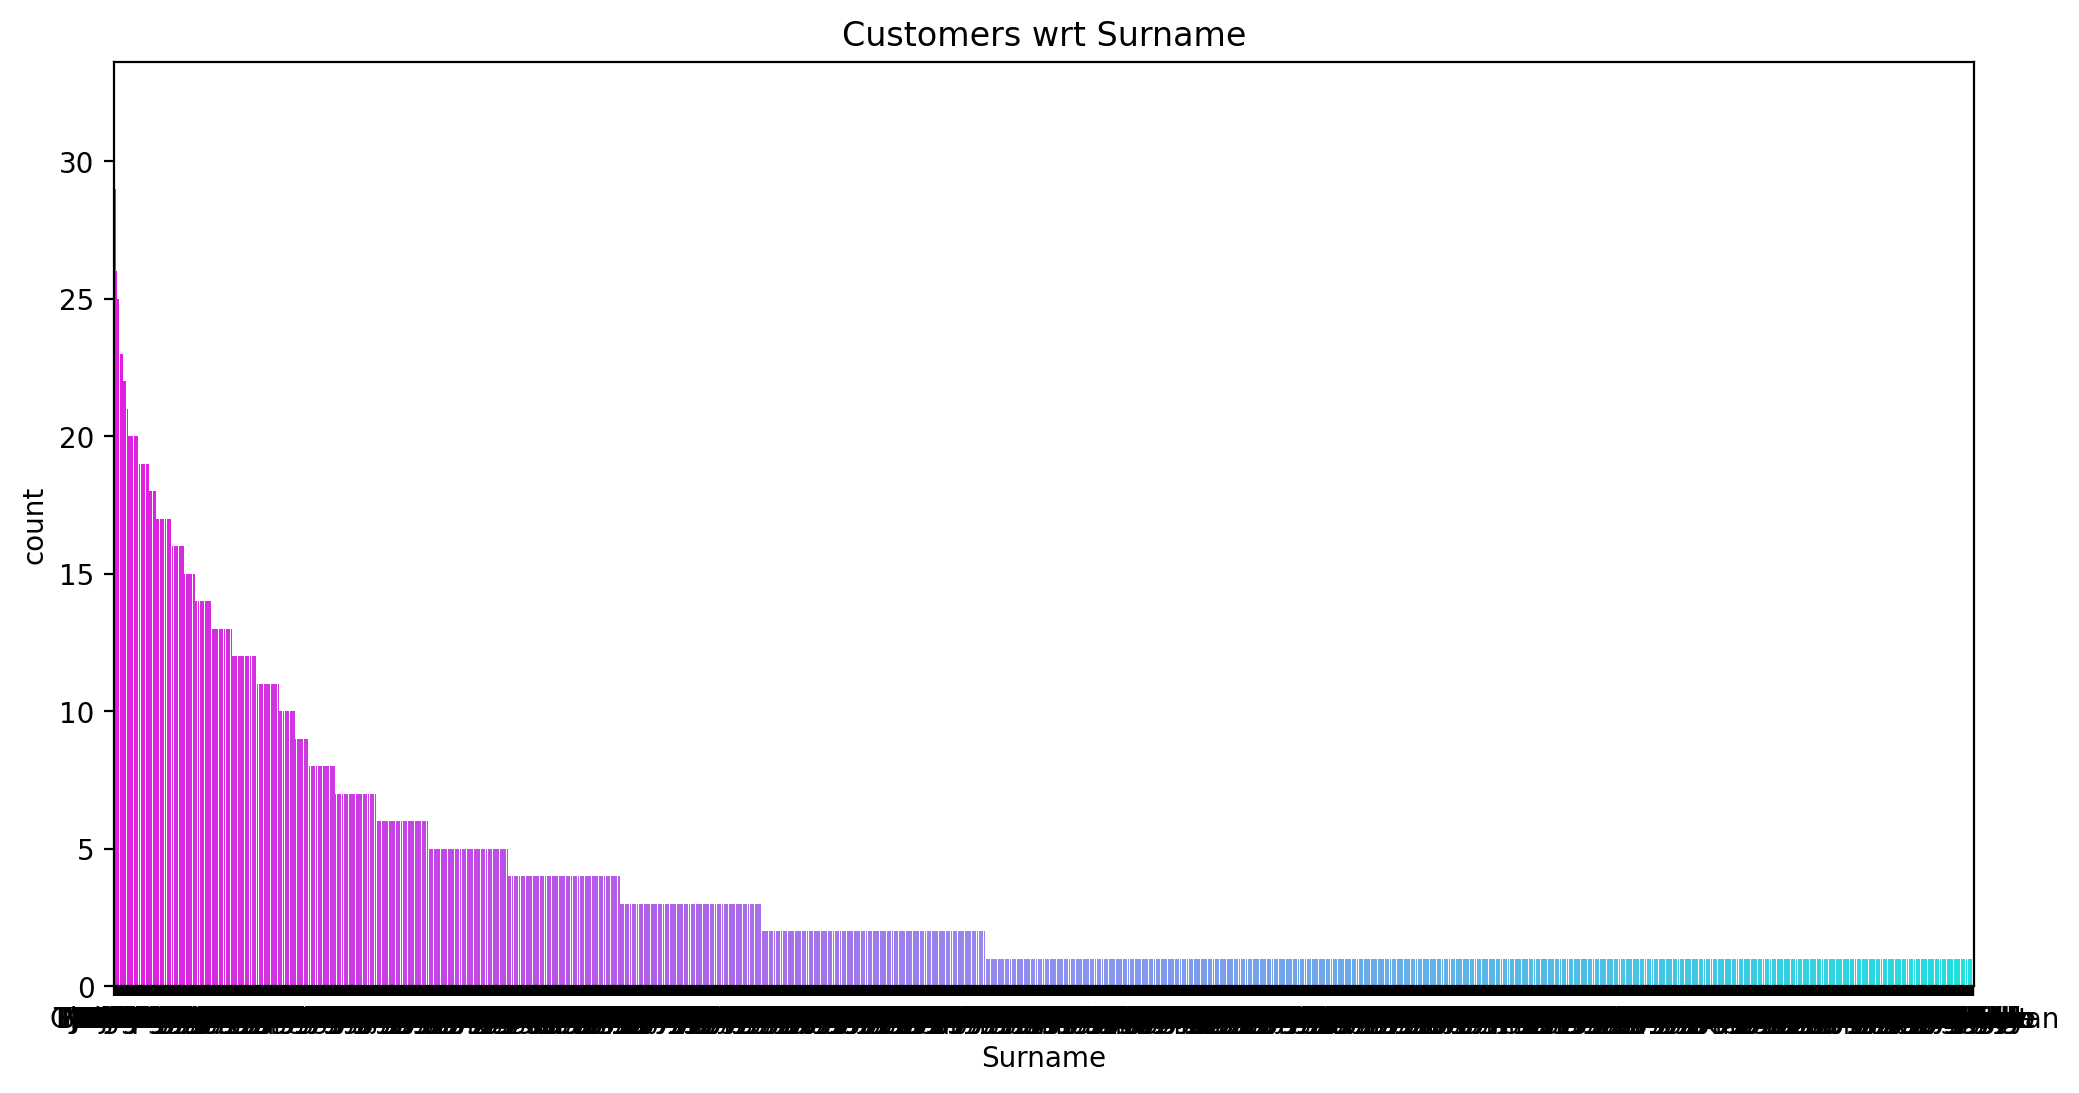

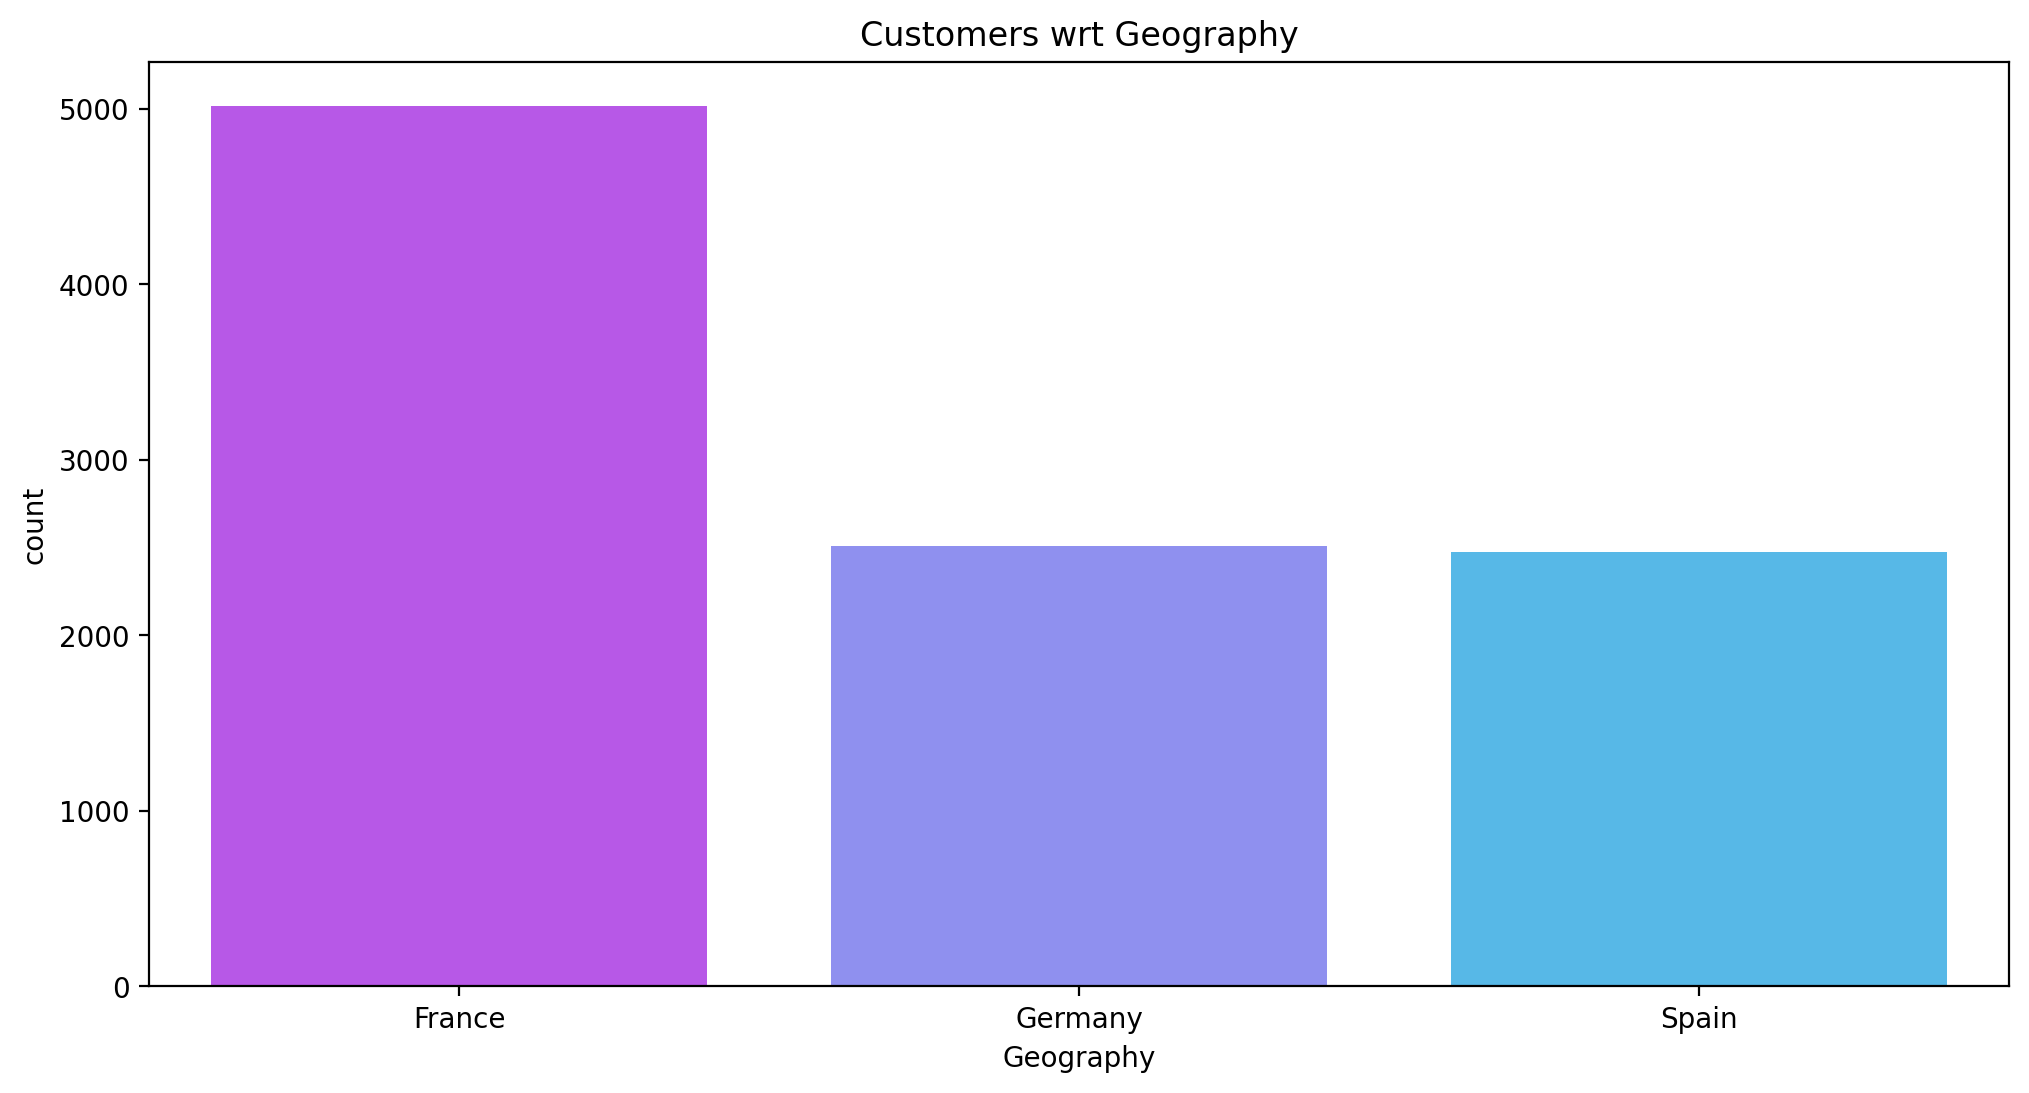

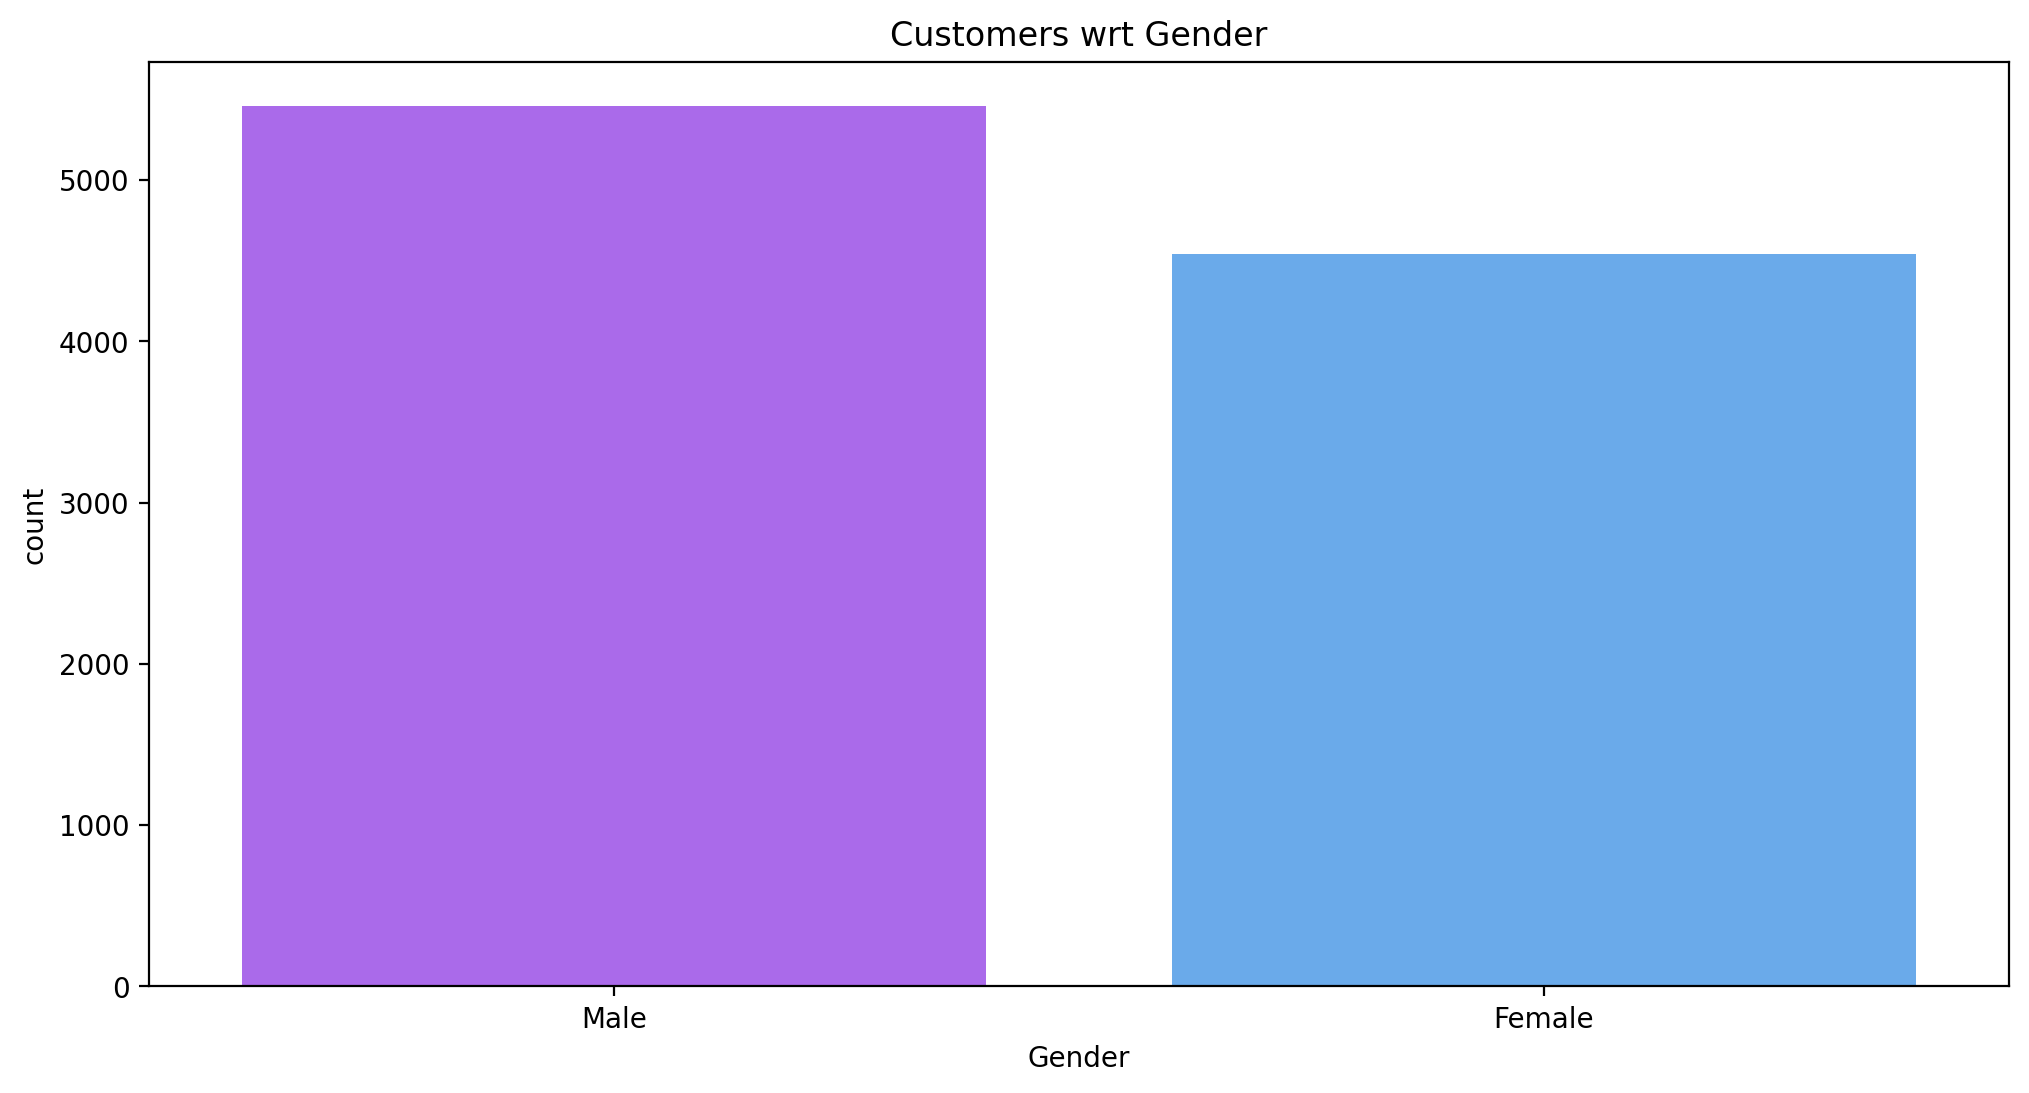

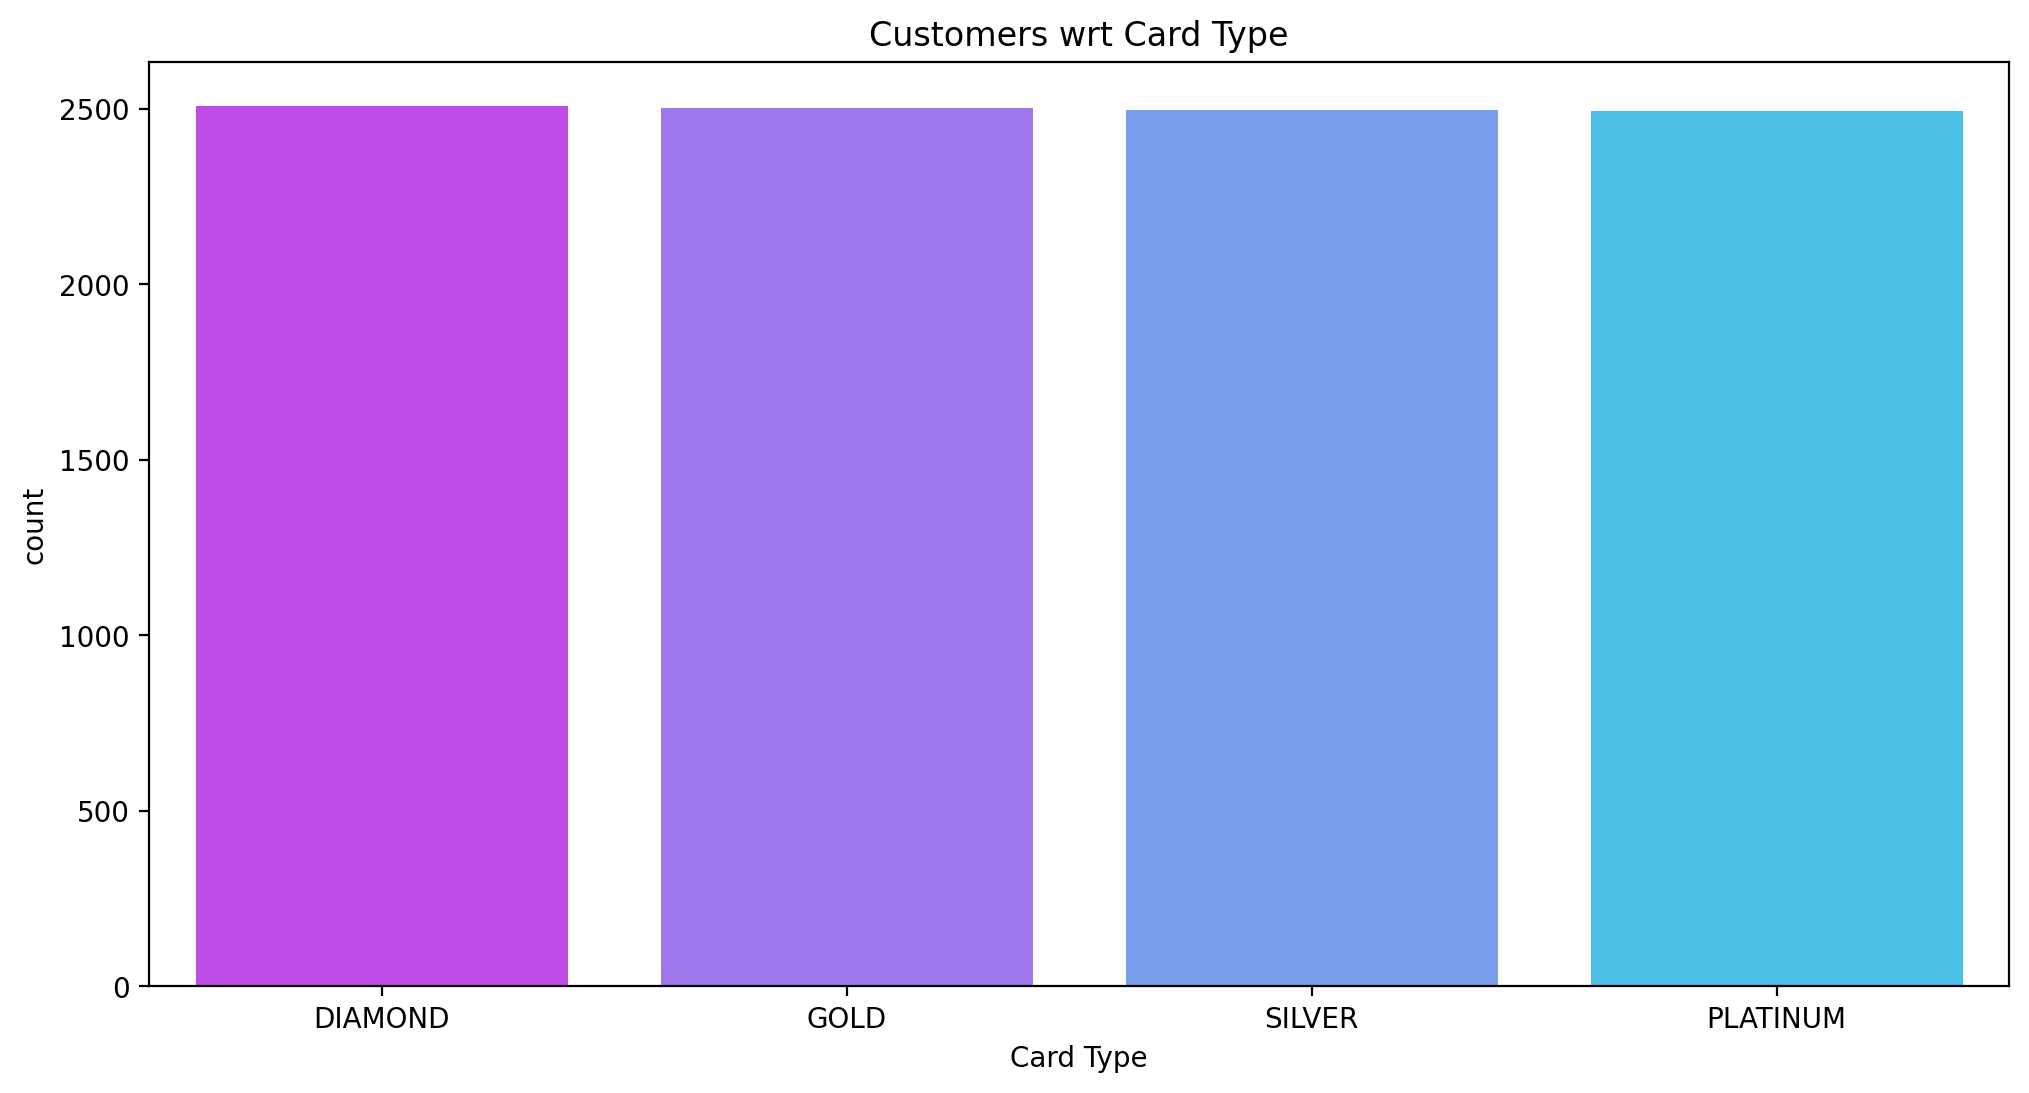

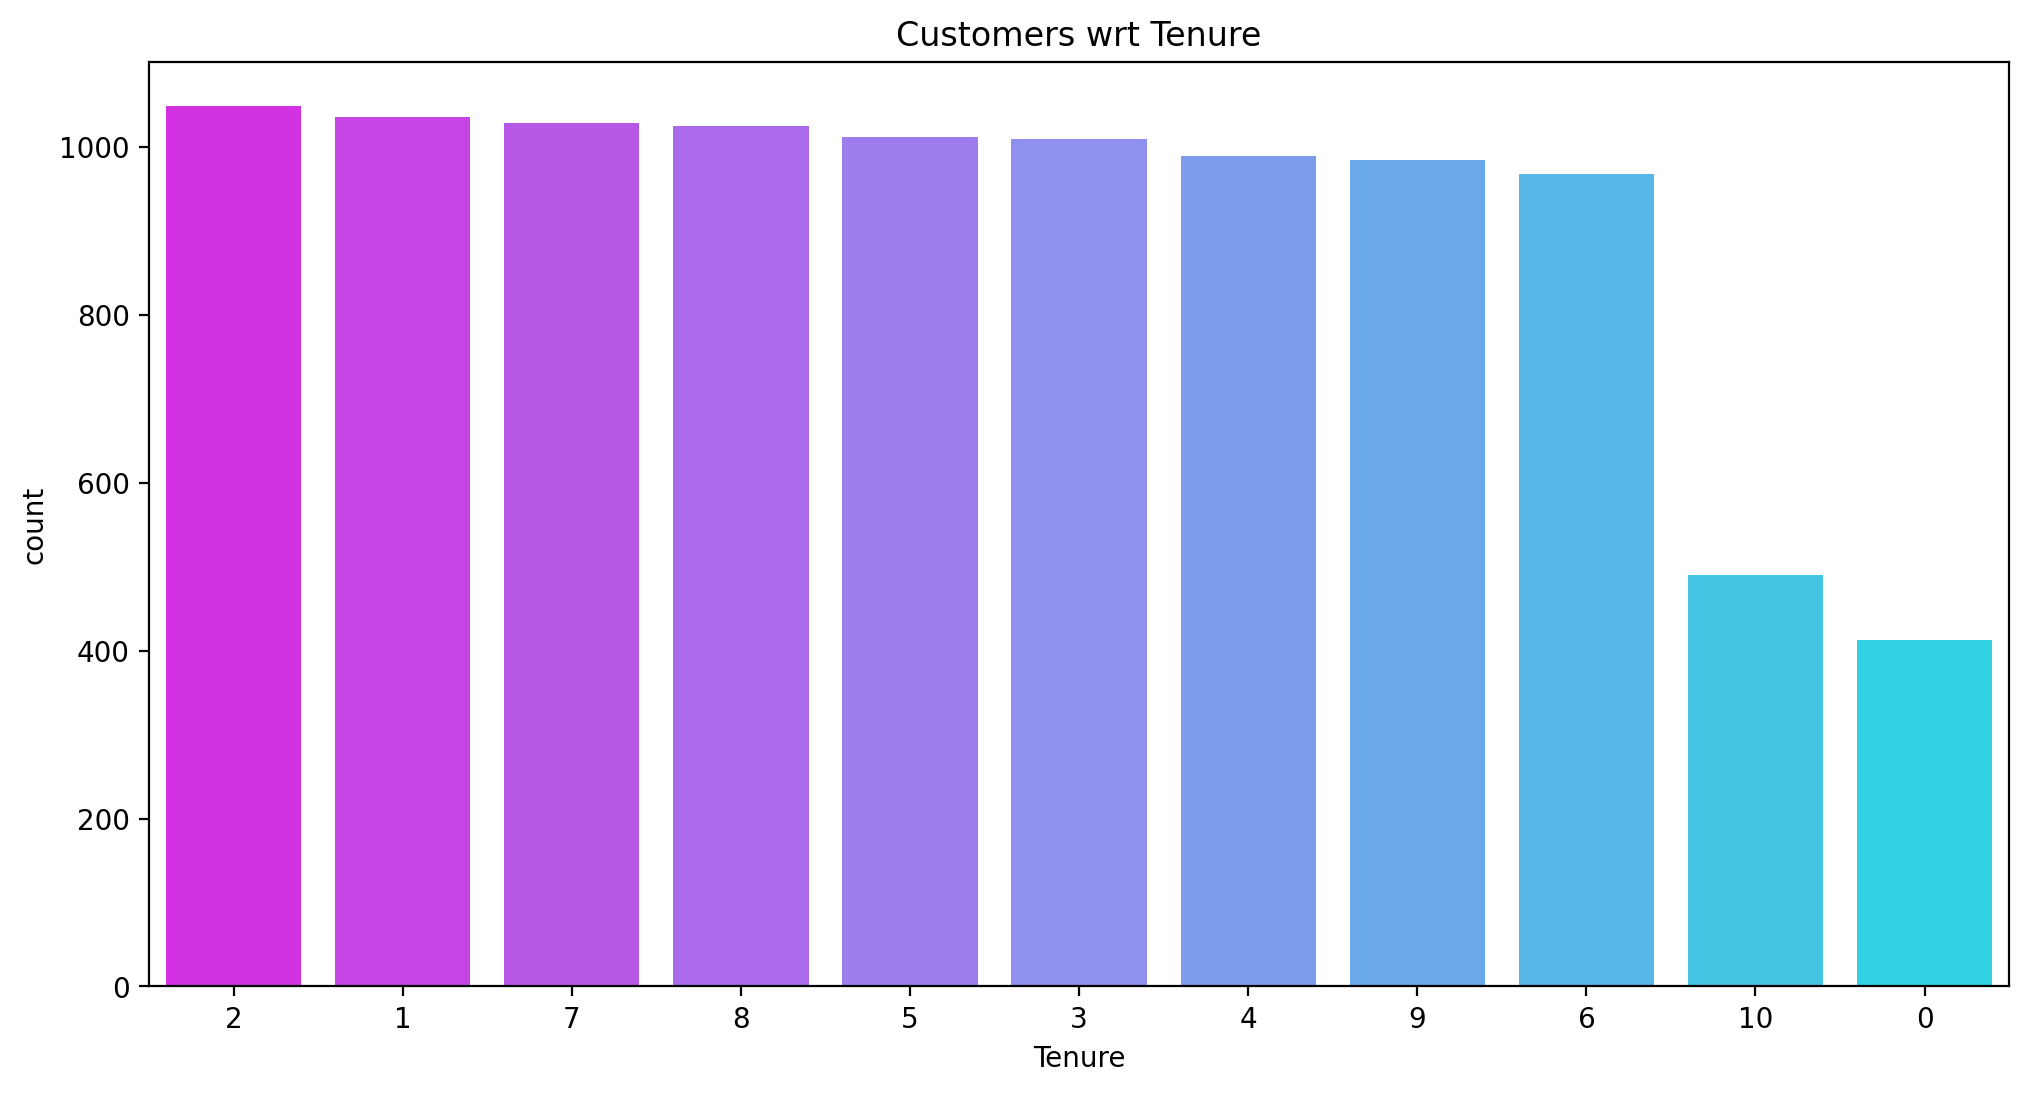

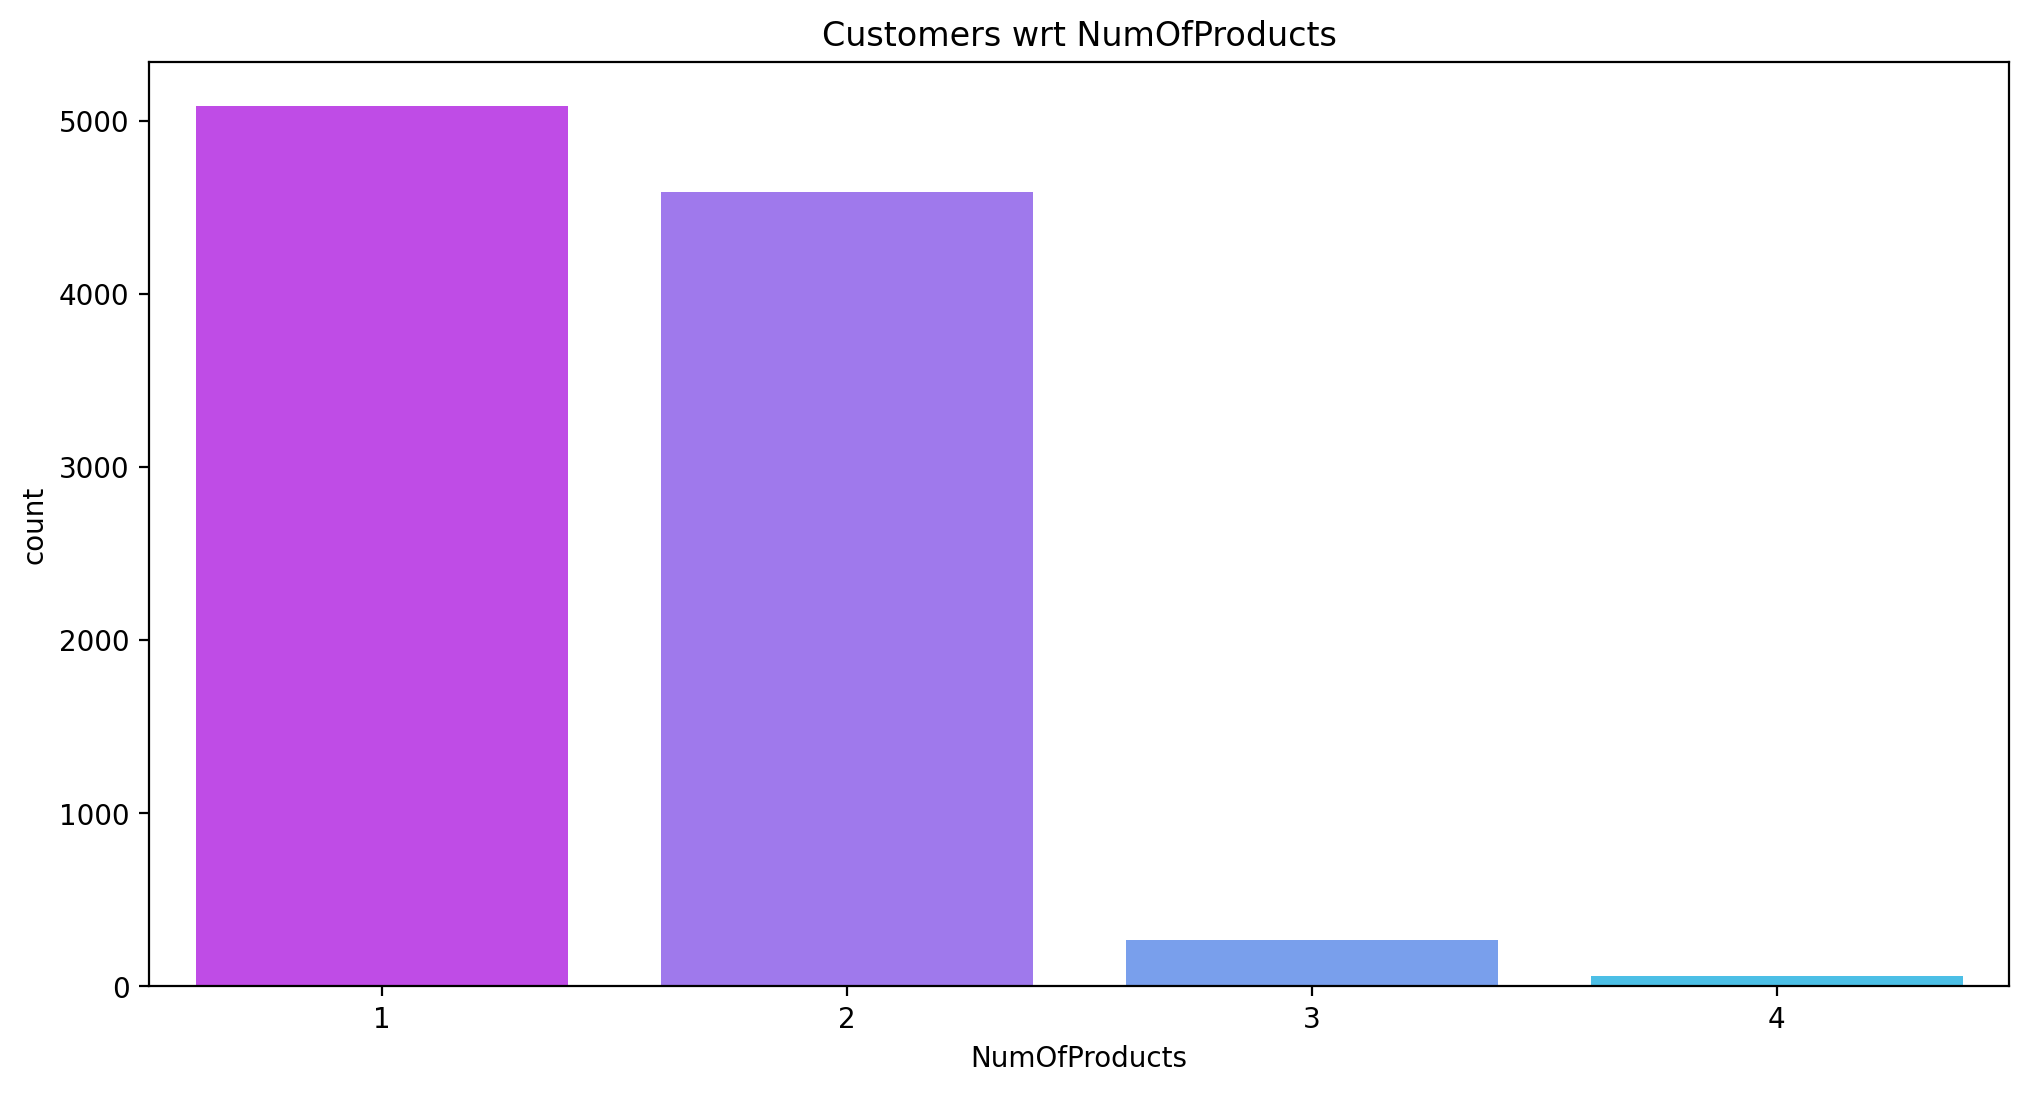

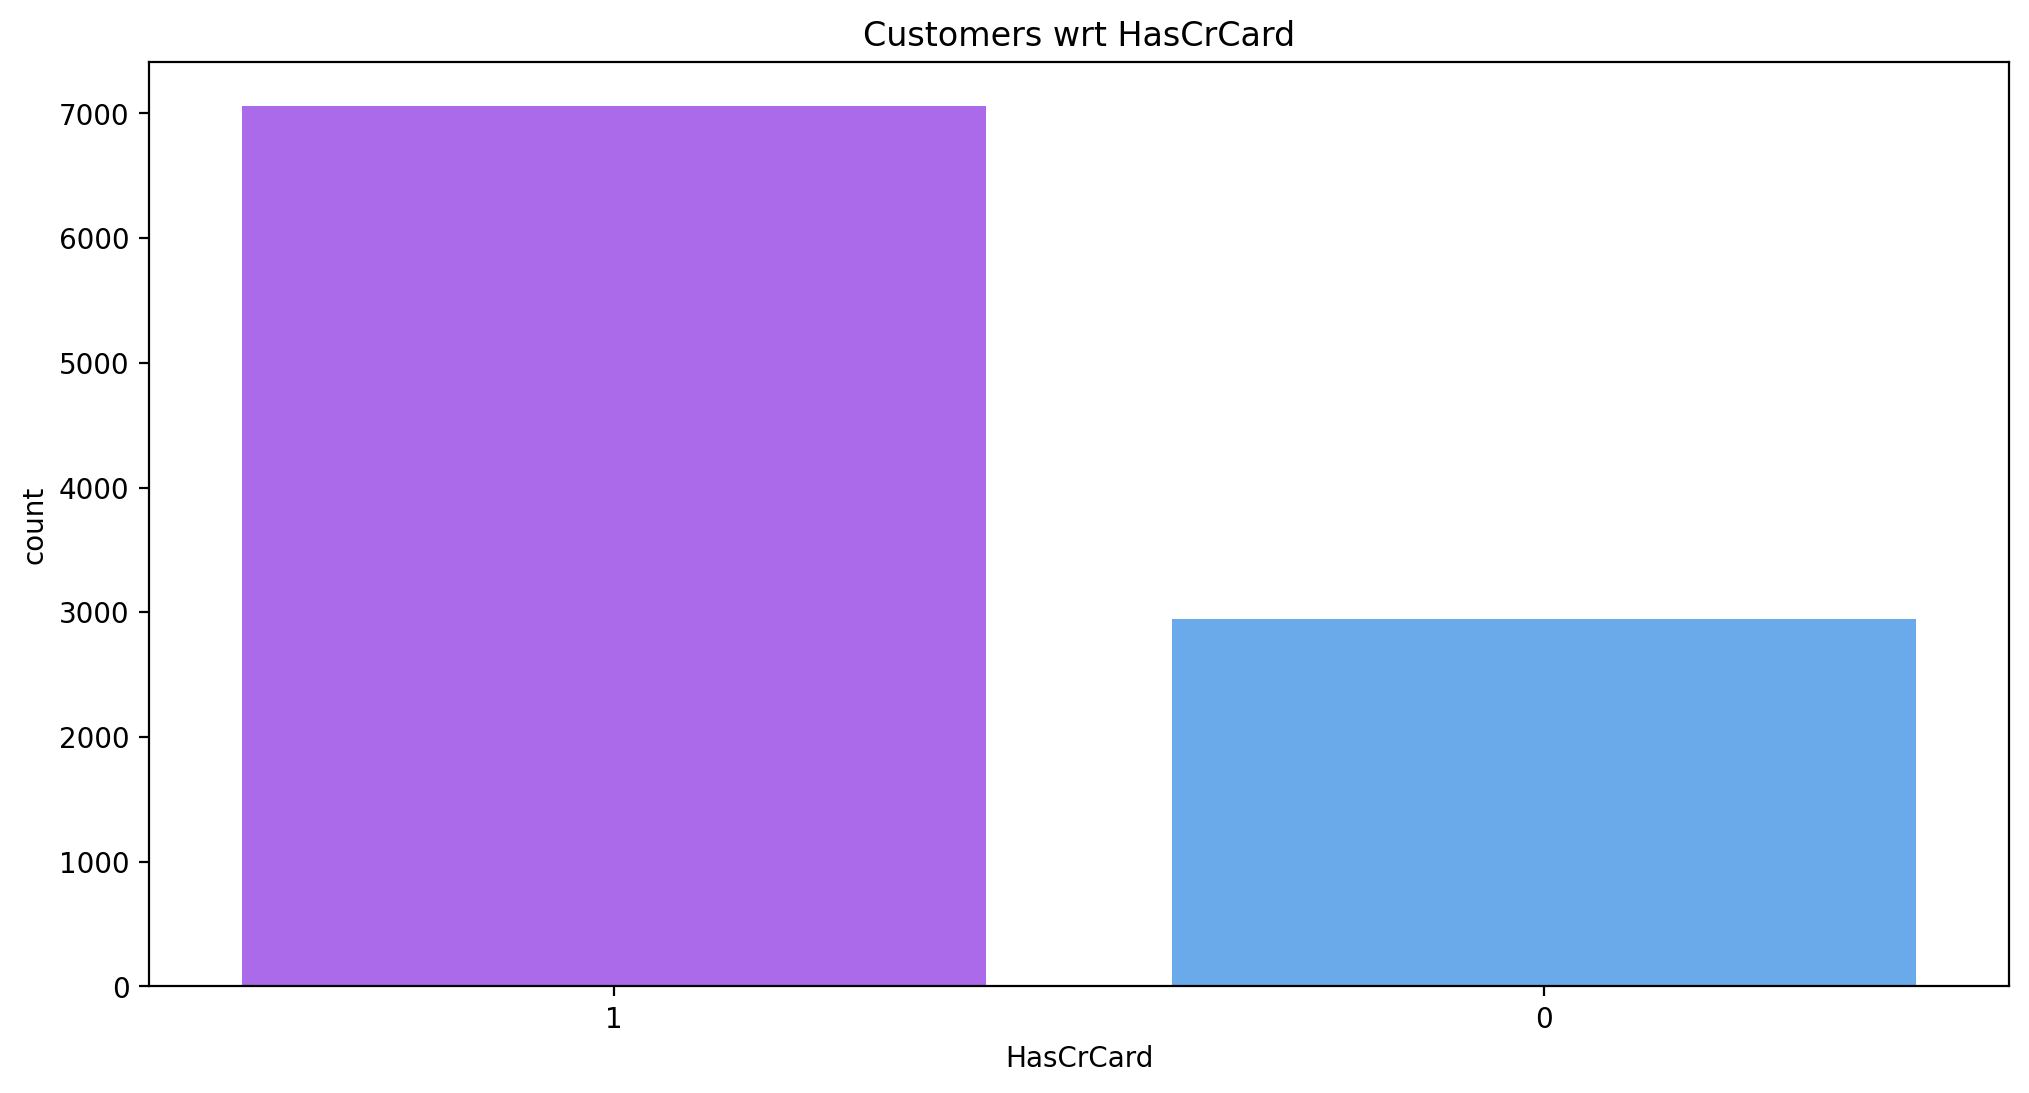

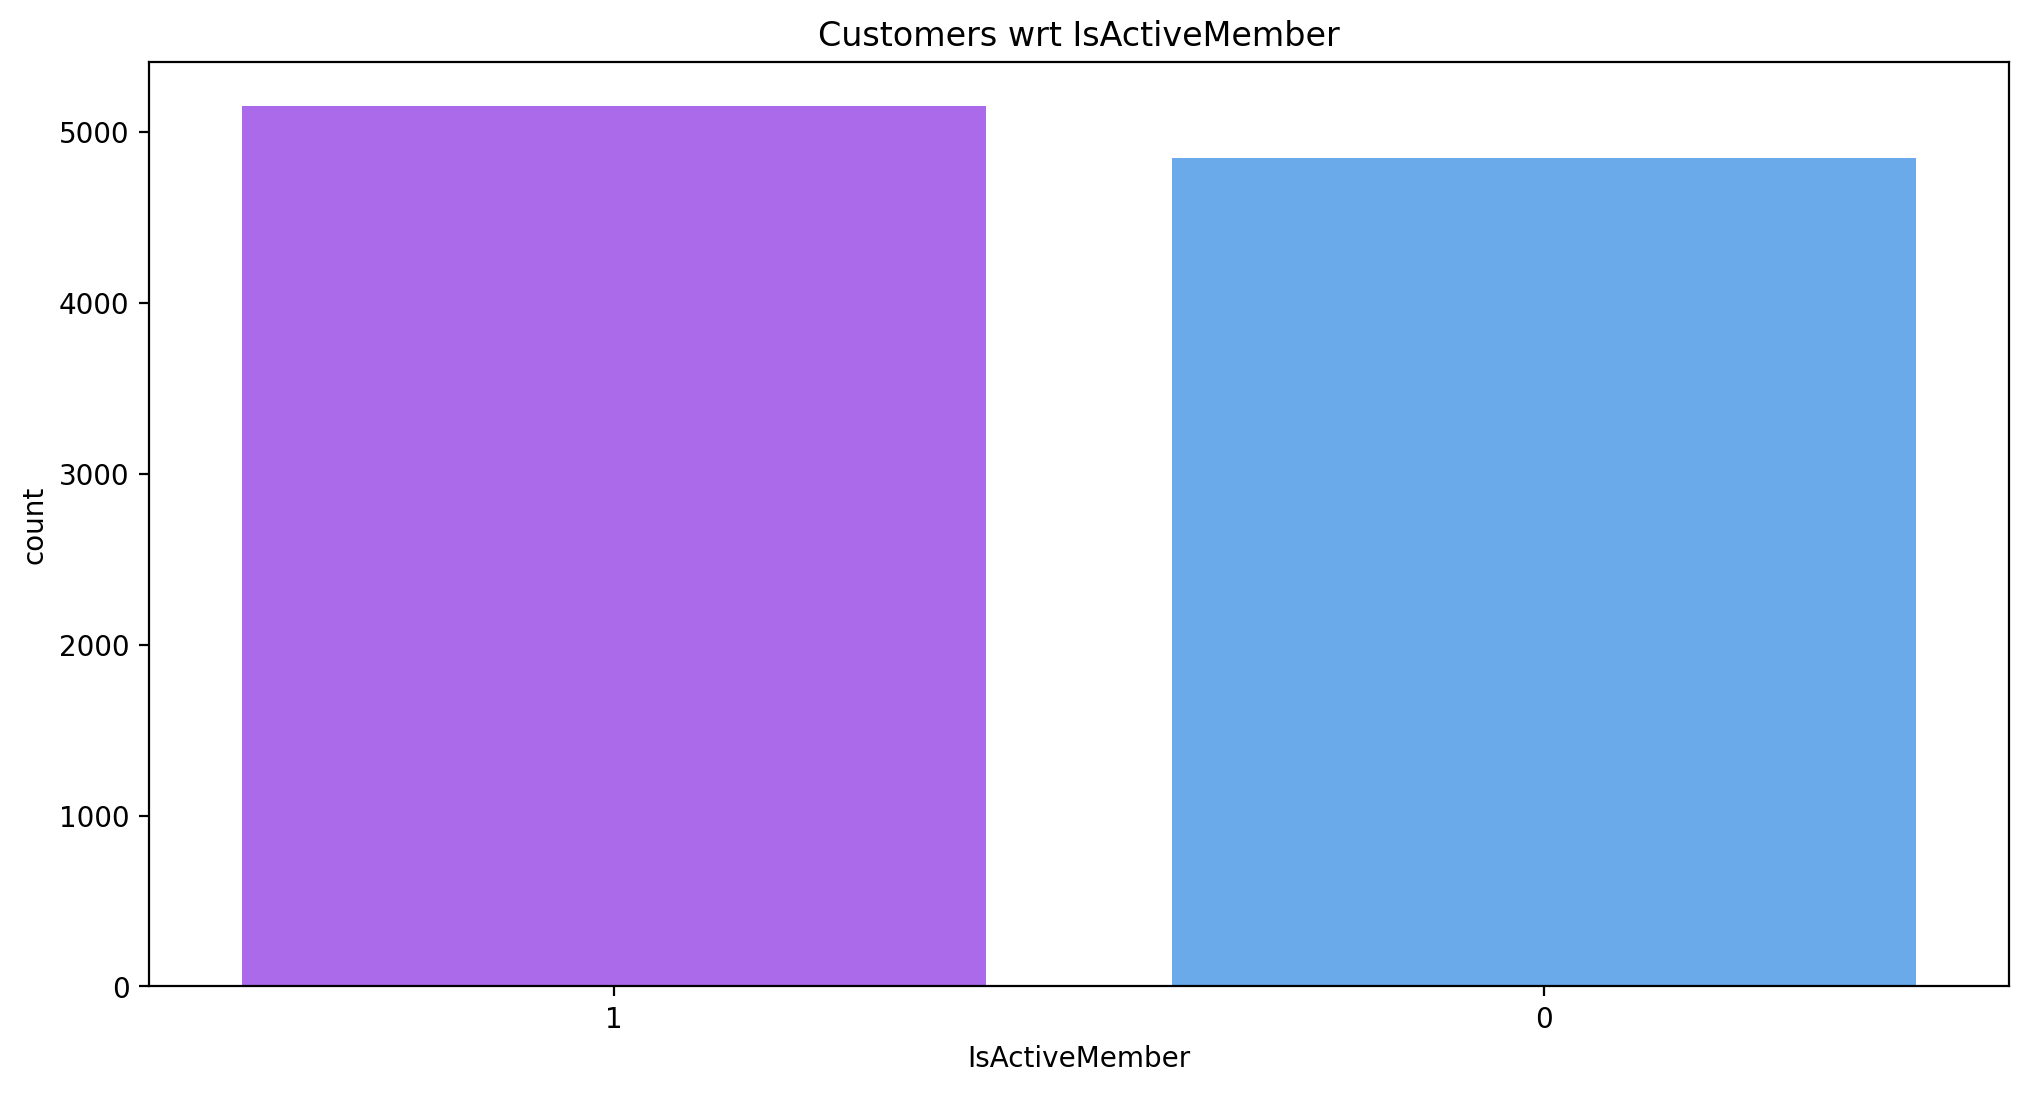

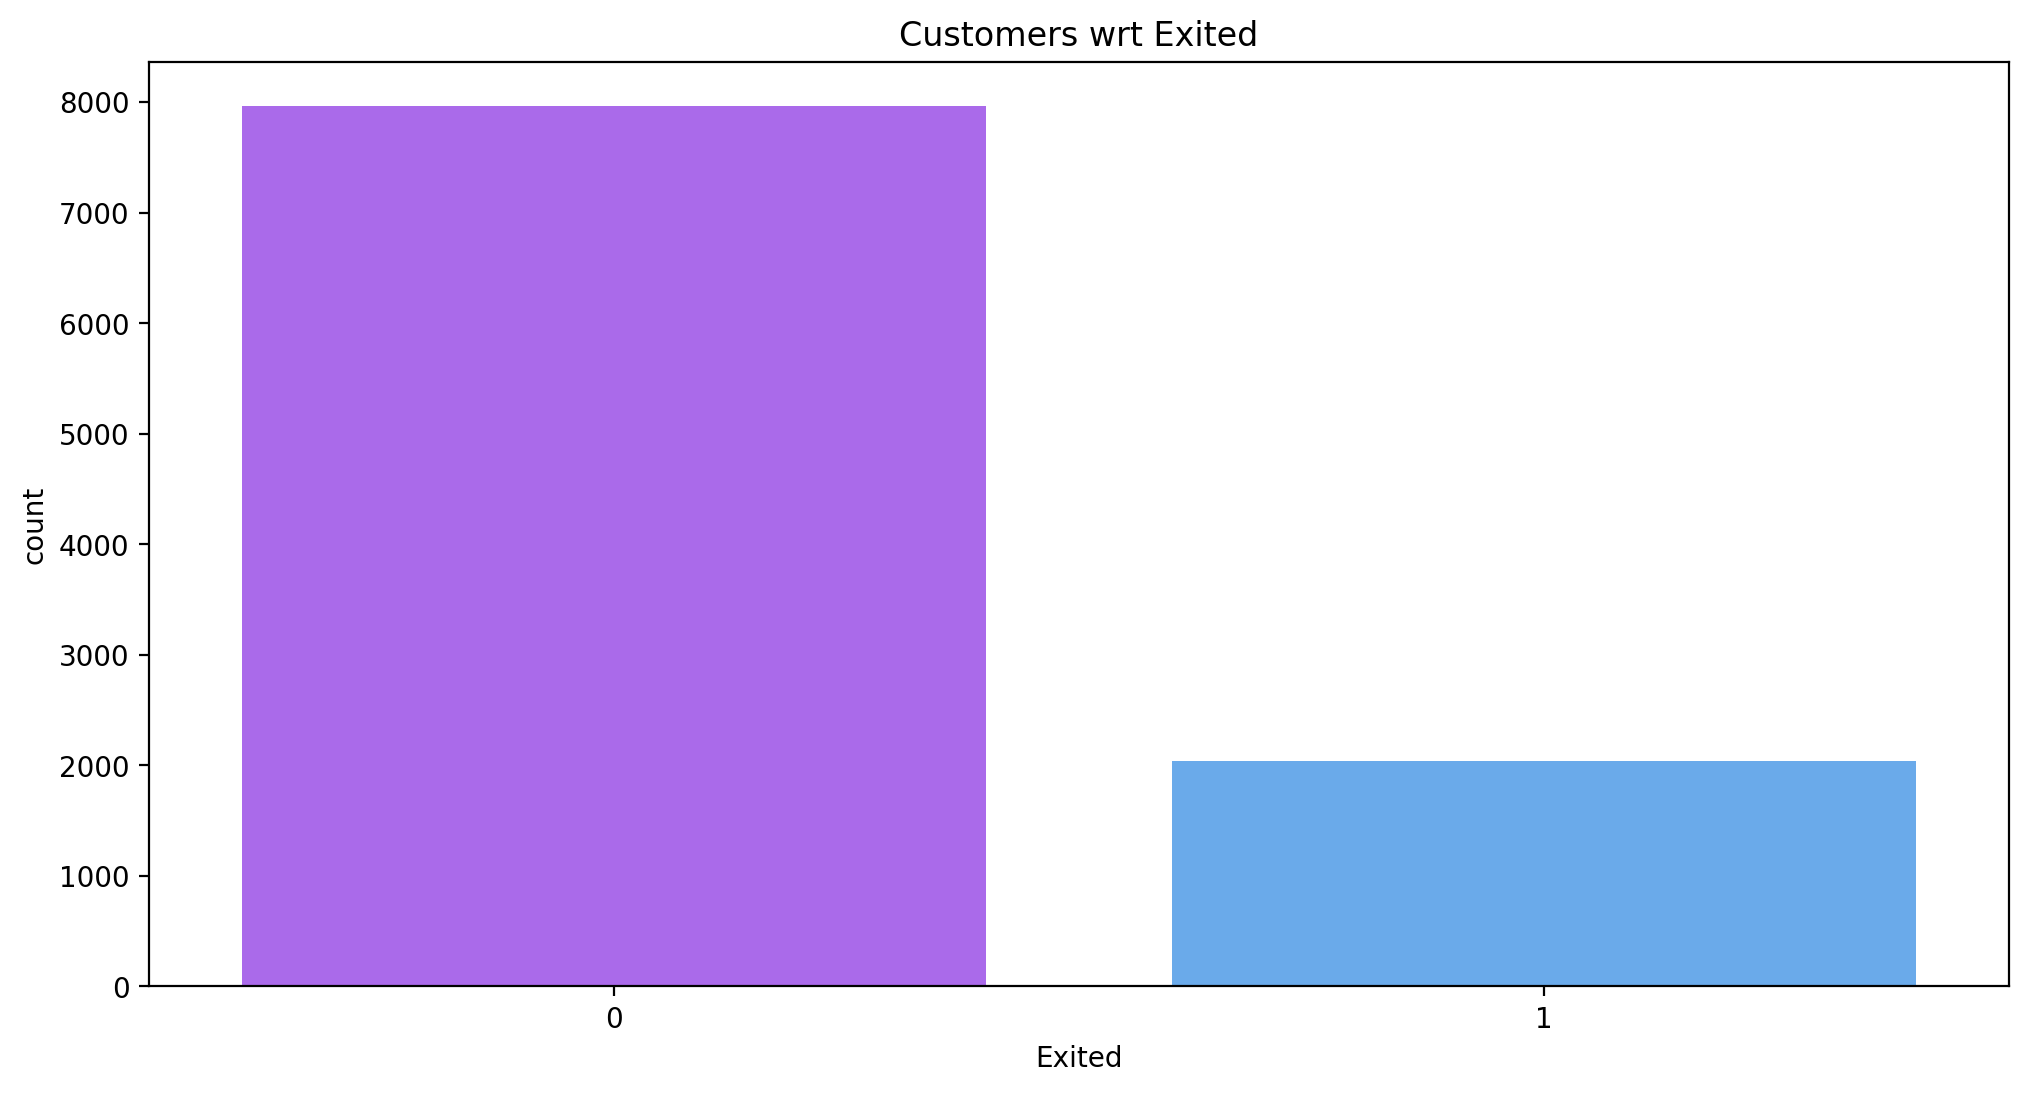

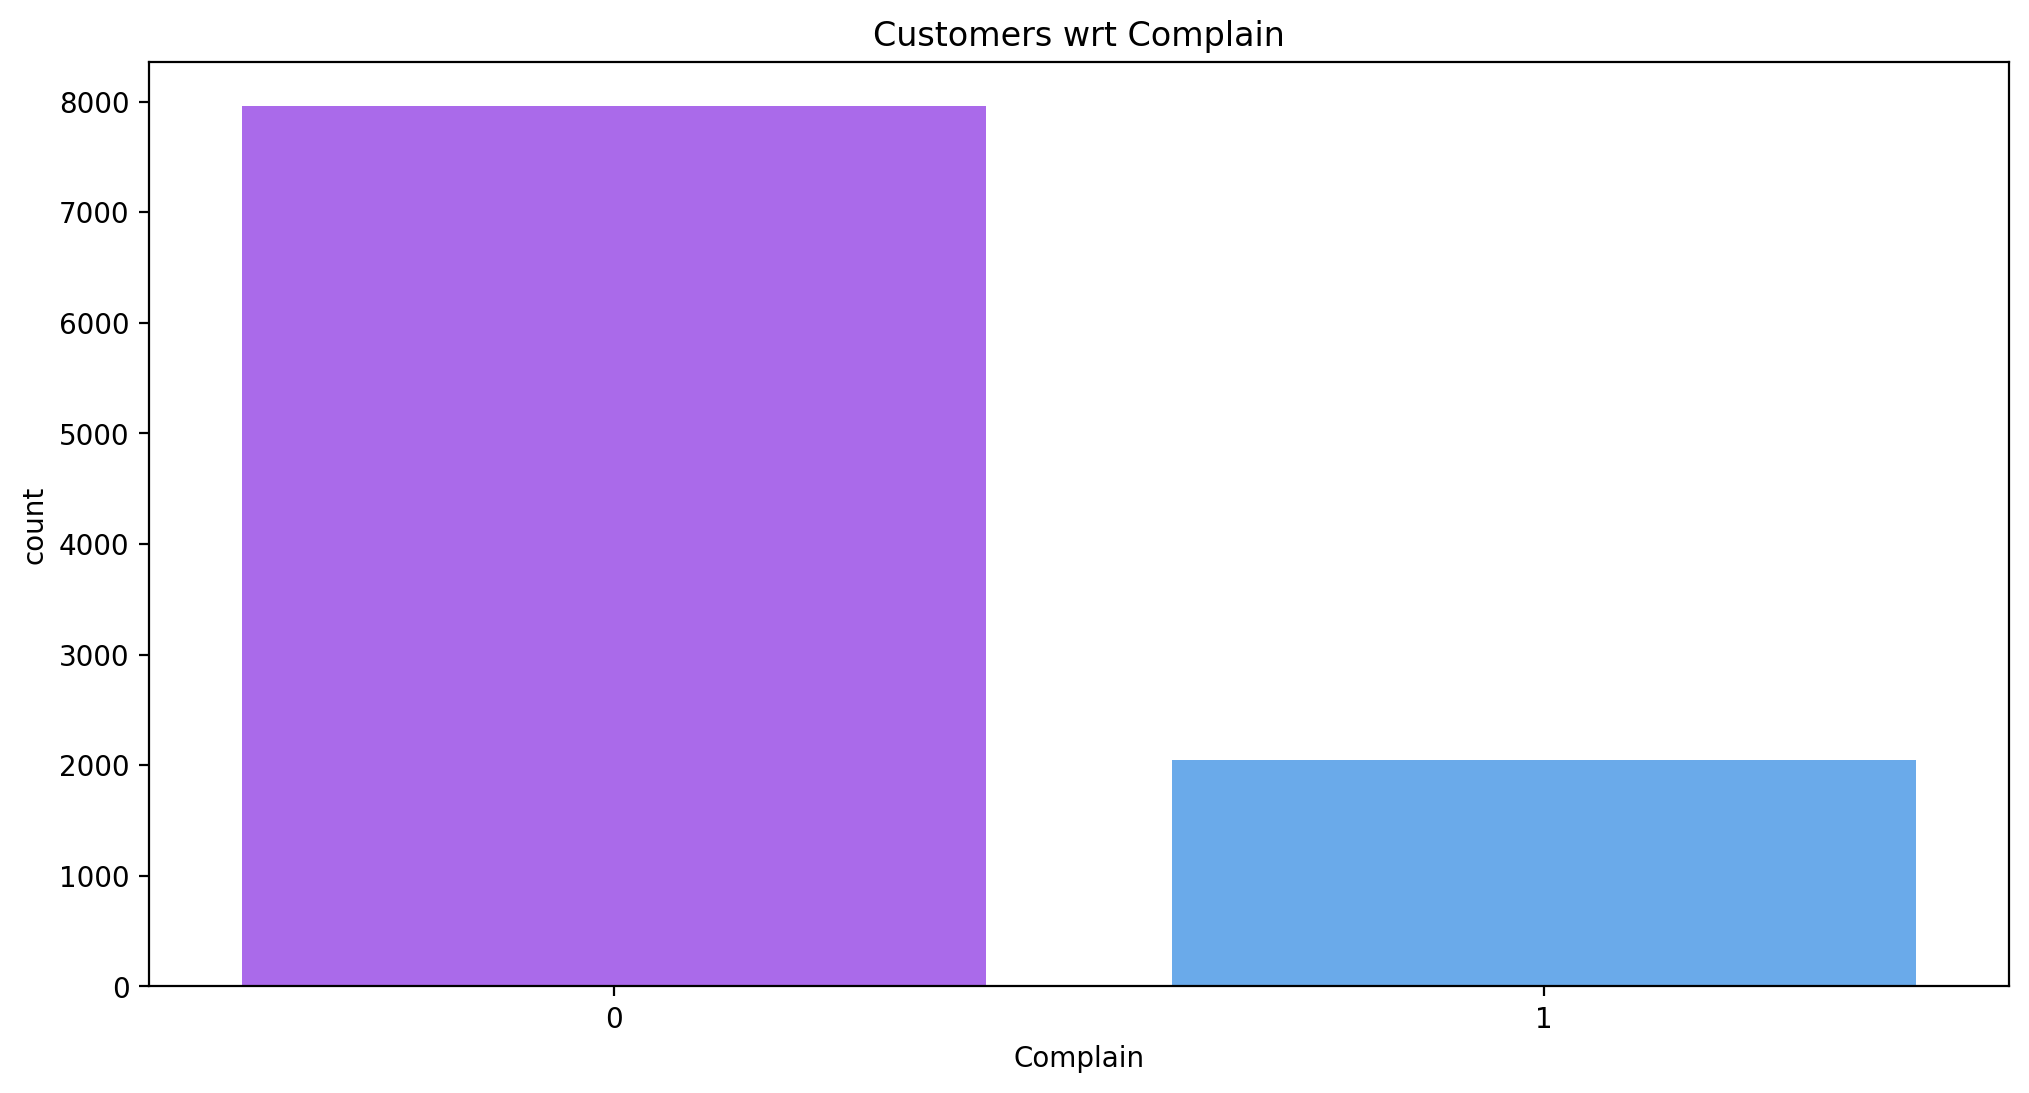

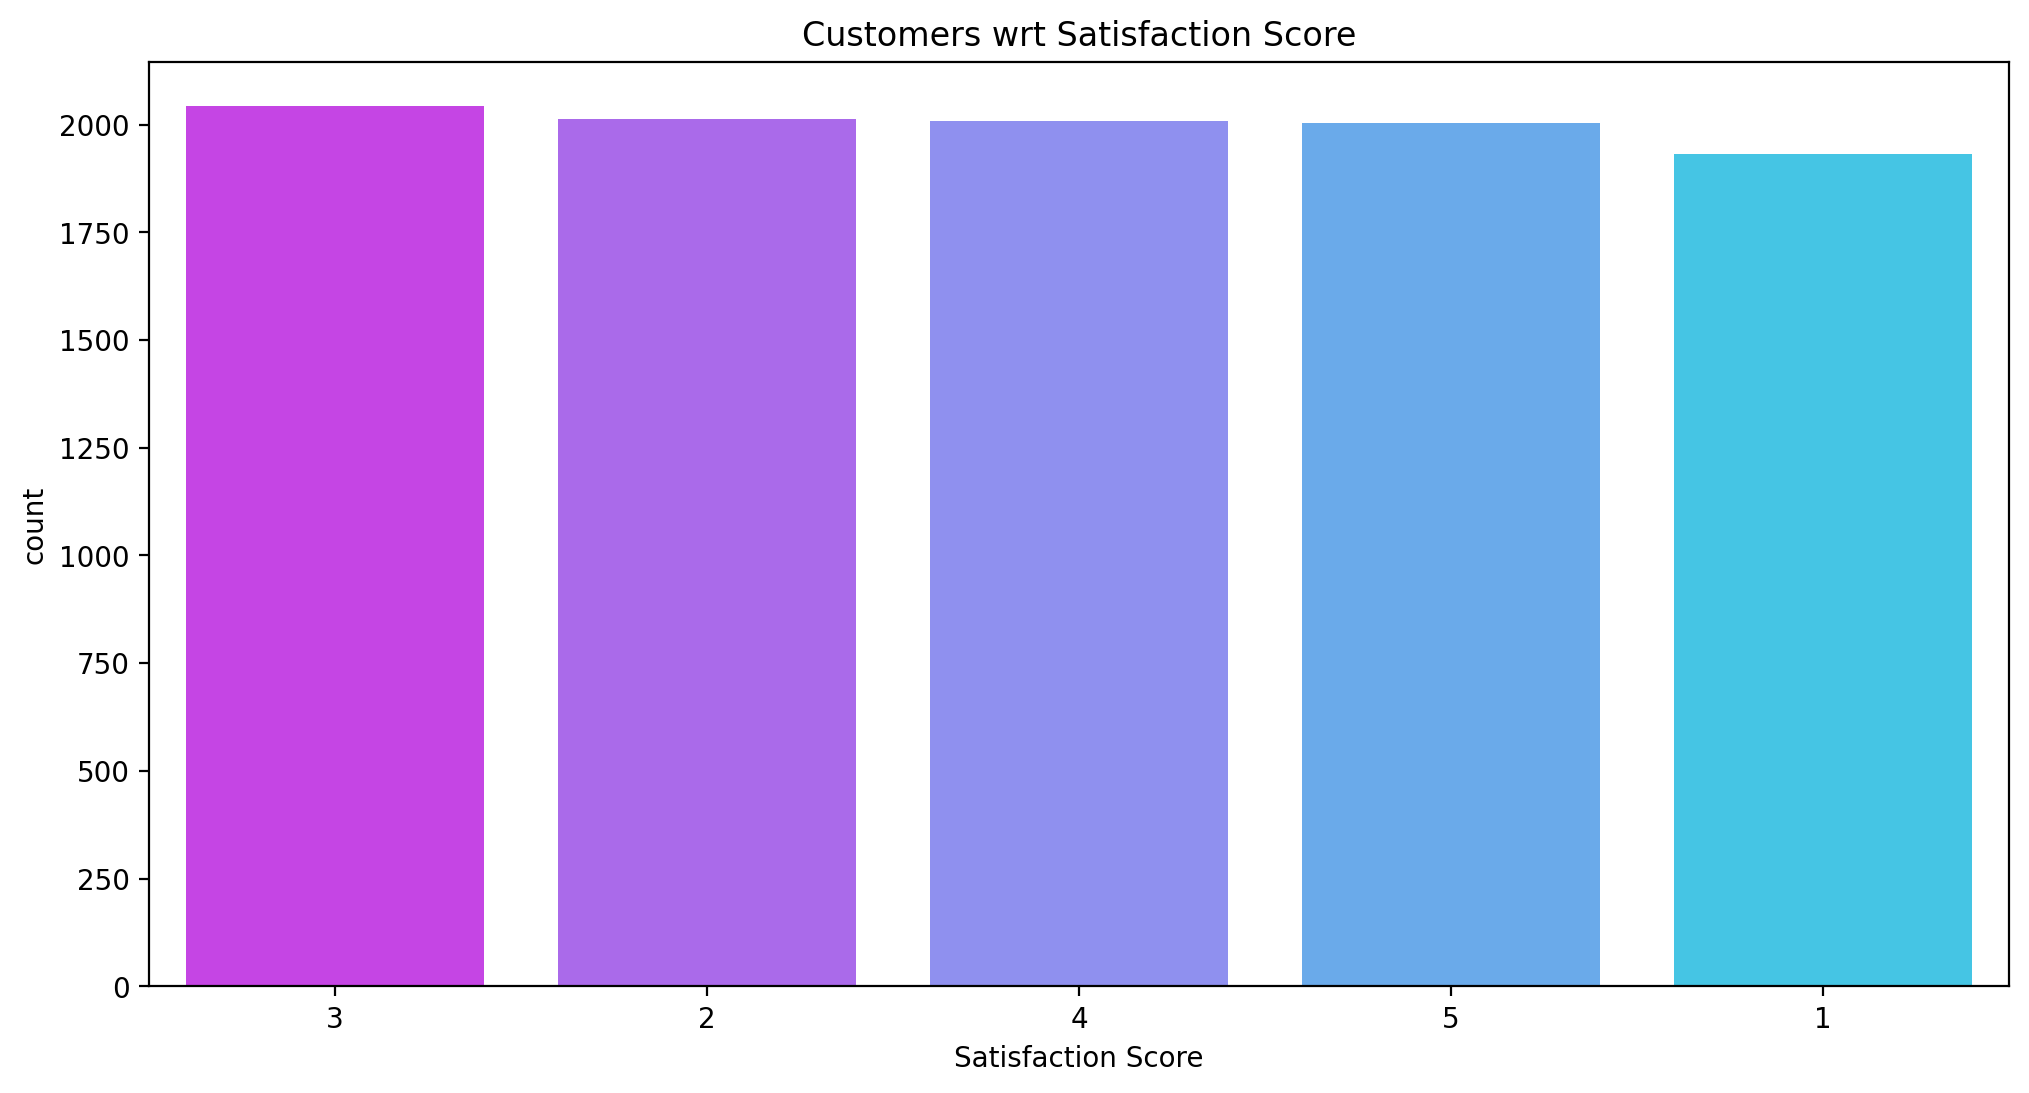

In [ ]:
cataplot(data_cat.columns)

## with respect to geo - france has more customers  
## we have some change in num of products - 1,2 prod holders are more , wrt has card - more pople hold a card ,active and inactive are almost similar ,,, people with no complains are more , satisfaction score also matters



In [ ]:
for i in data_num.columns:
    fig=go.Figure()
    fig.add_trace(go.Histogram(x=data_num[i], name=i ,opacity=0.75 ))
    fig.update_layout(title='{} distribution'.format(i),xaxis=dict(title='Values'),yaxis=dict(title='Count'),bargap=0.1,  bargroupgap=0.2,  )

    fig.show()



In [ ]:
max(data['Age'].values)


92

In [ ]:
data_cat.columns


Index(['Surname', 'Geography', 'Gender', 'Card Type', 'Tenure',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain',
       'Satisfaction Score'],
      dtype='object')

In [ ]:
## for bi varient analasys i choose geography , tenure ,gender (may and may not ),no of products ,active , satisfaction, has card, complain,points, balance ,cr score,card type  .

In [ ]:
Geography_churn=data.groupby(['Geography','Exited']).size()
Geography_churn

Geography  Exited
France     0         4203
           1          811
Germany    0         1695
           1          814
Spain      0         2064
           1          413
dtype: int64

In [ ]:
Geography_churn=Geography_churn.reset_index()


In [ ]:
Geography_churn.columns=['Geography','churn','count']
Geography_churn[Geography_churn['churn']==1]['count']


1    811
3    814
5    413
Name: count, dtype: int64

In [ ]:
plot_yes=go.Bar(x=Geography_churn[Geography_churn['churn']==1]['Geography'],
            y=Geography_churn[Geography_churn['churn']==1]['count'],
            text=Geography_churn[Geography_churn['churn']==1]['count'],
            textposition='inside' )
plot_no=go.Bar(x=Geography_churn[Geography_churn['churn']!=1]['Geography'],
            y=Geography_churn[Geography_churn['churn']!=1]['count'],
            text=Geography_churn[Geography_churn['churn']!=1]['count'],
            textposition='inside' )
ploting=[plot_yes,plot_no]
layout=go.Layout(height=500,width=500,title='customer churn wrt Geography')
fig=go.Figure(data=ploting,layout=layout)
iplot(fig)

In [ ]:
def bivarcat(data_cat):
    for i in data_cat.columns:
        if(i!='Exited'):
            print(data.groupby(['{}'.format(i),'Exited']).size())
            plt.figure(figsize=(8, 6))
            sns.countplot(x='{}'.format(i), hue='Exited', data=data_cat)
            plt.title('Churn by {}'.format(i))
            plt.show()



Surname   Exited
Abazu     0         2
Abbie     0         1
Abbott    0         3
          1         1
Abdullah  1         1
                   ..
Zubareva  0         1
Zuev      0         1
Zuyev     0         1
          1         1
Zuyeva    0         2
Length: 3804, dtype: int64


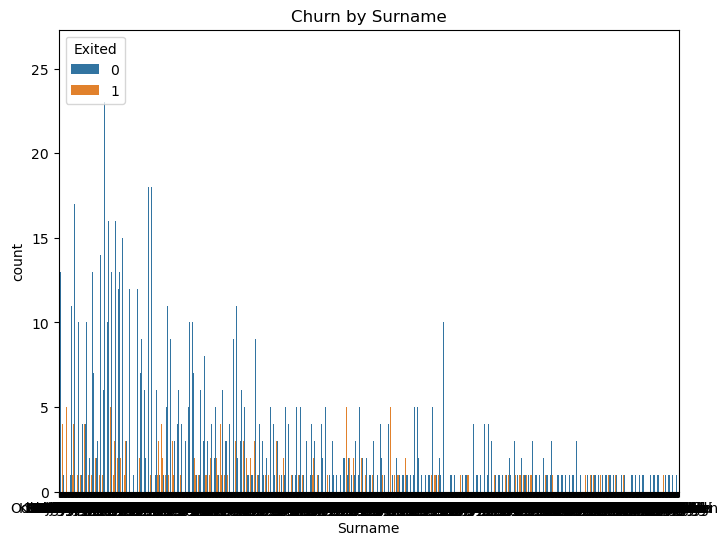

Geography  Exited
France     0         4203
           1          811
Germany    0         1695
           1          814
Spain      0         2064
           1          413
dtype: int64


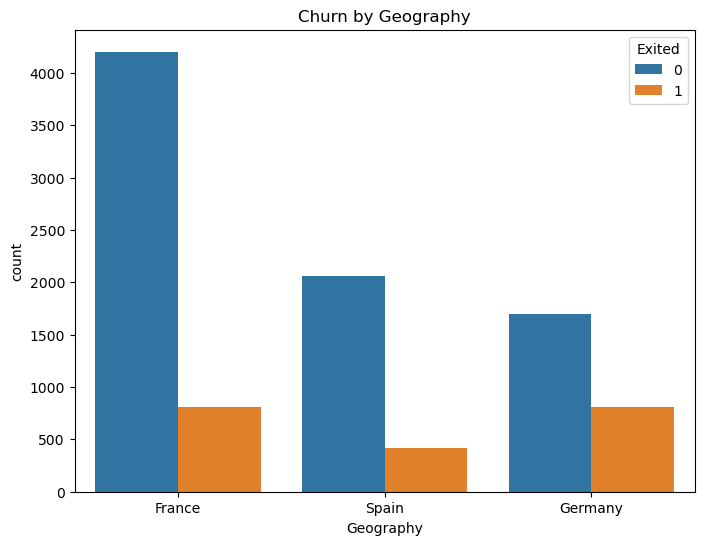

Gender  Exited
Female  0         3404
        1         1139
Male    0         4558
        1          899
dtype: int64


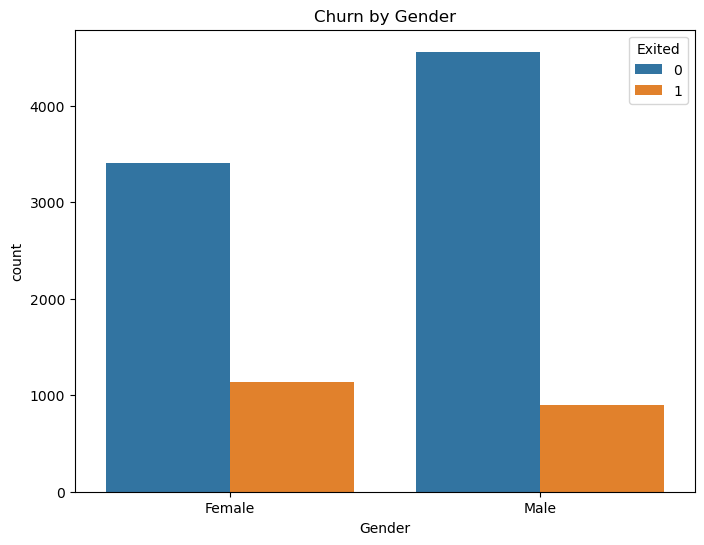

Card Type  Exited
DIAMOND    0         1961
           1          546
GOLD       0         2020
           1          482
PLATINUM   0         1987
           1          508
SILVER     0         1994
           1          502
dtype: int64


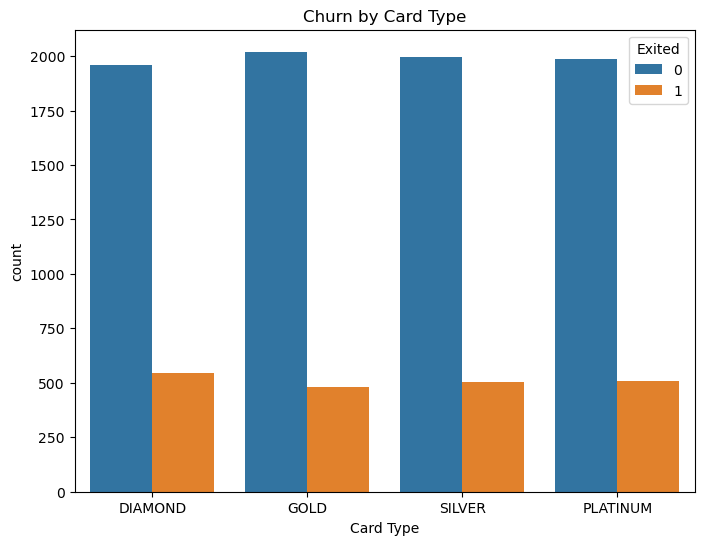

Tenure  Exited
0       0         318
        1          95
1       0         803
        1         232
2       0         847
        1         201
3       0         796
        1         213
4       0         786
        1         203
5       0         803
        1         209
6       0         771
        1         196
7       0         851
        1         177
8       0         828
        1         197
9       0         770
        1         214
10      0         389
        1         101
dtype: int64


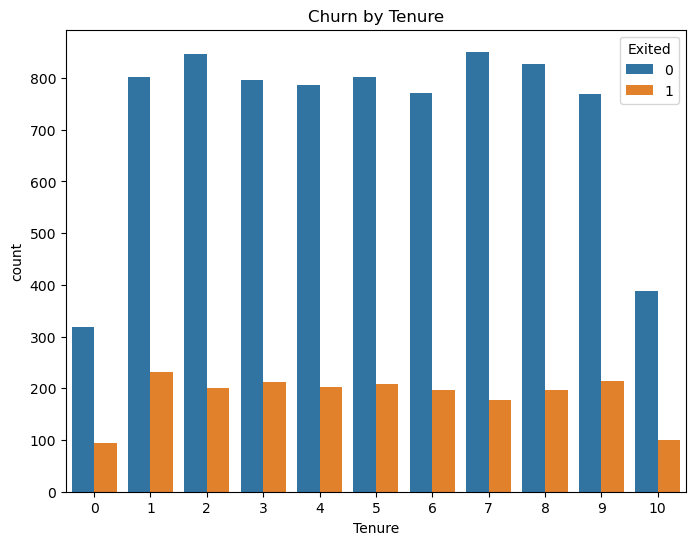

NumOfProducts  Exited
1              0         3675
               1         1409
2              0         4241
               1          349
3              0           46
               1          220
4              1           60
dtype: int64


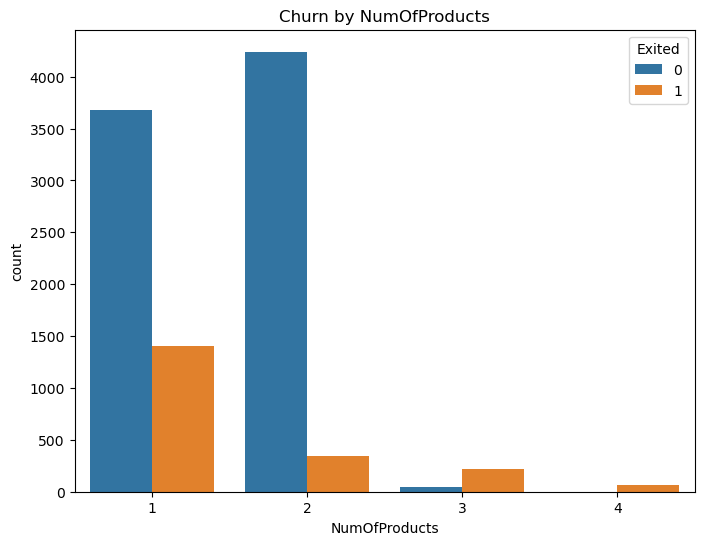

HasCrCard  Exited
0          0         2332
           1          613
1          0         5630
           1         1425
dtype: int64


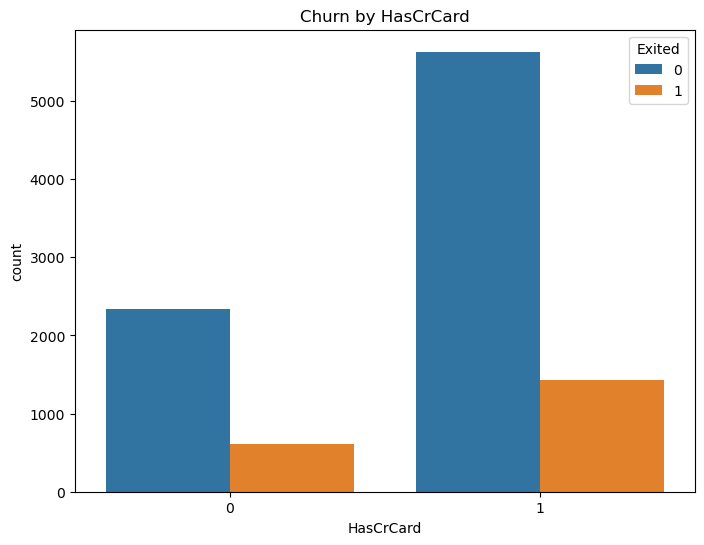

IsActiveMember  Exited
0               0         3546
                1         1303
1               0         4416
                1          735
dtype: int64


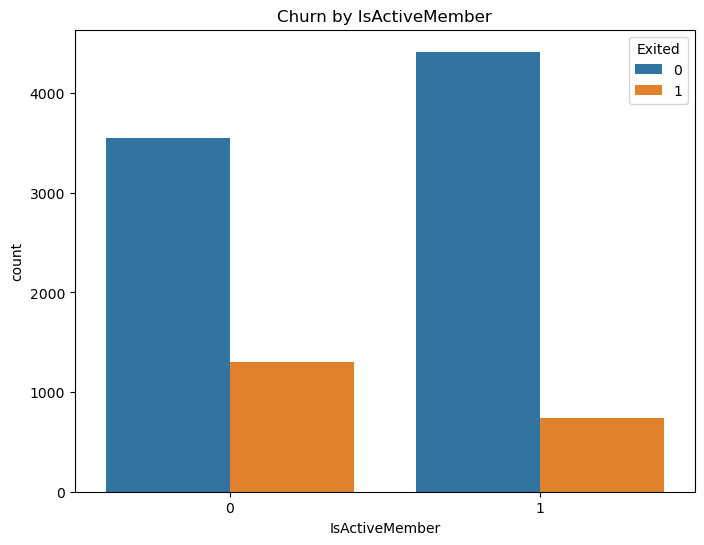

Complain  Exited
0         0         7952
          1            4
1         0           10
          1         2034
dtype: int64


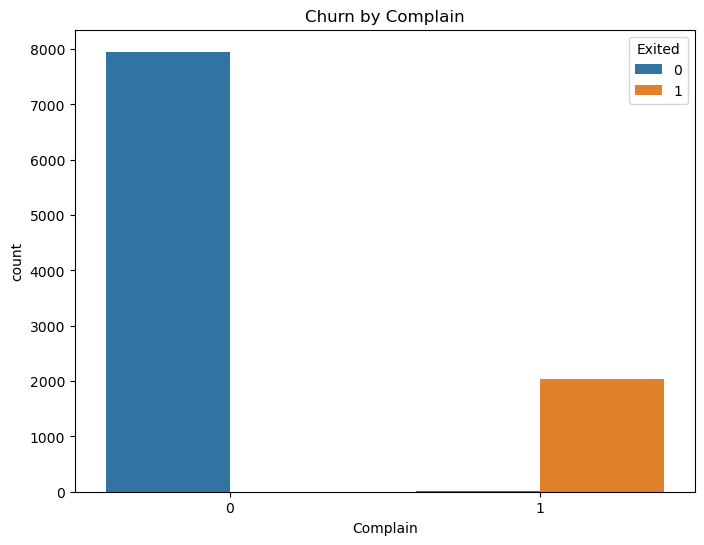

Satisfaction Score  Exited
1                   0         1545
                    1          387
2                   0         1575
                    1          439
3                   0         1641
                    1          401
4                   0         1594
                    1          414
5                   0         1607
                    1          397
dtype: int64


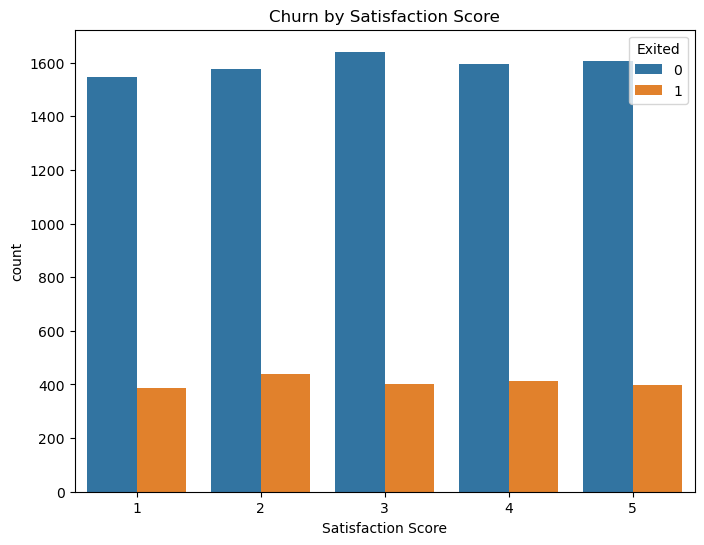

In [ ]:
bivarcat(data_cat)

In [ ]:
for i in data_num.columns:
    print(i)

CreditScore
Age
Balance
EstimatedSalary
Point Earned


## bi varient for numarical variables

In [ ]:
for i in data_num.columns:
            trace1 = go.Box(x=data.Exited,y= data['{}'.format(i)],name = '{} with no churn'.format(i),boxpoints = 'all'a,jitter = 1)
            box = [trace1]

            layout = go.Layout(width = 1000,height = 500,title = 'customer churn wrt {}'.format(i))
            fig = go.Figure(data=box,layout = layout)
            iplot(fig)

## q1-  relation between tenure and credit card  and exited or churned

In [ ]:
q1=data.groupby(['Tenure']['HasCrCard'==0])['Exited']
q1.size()

Tenure
0      413
1     1035
2     1048
3     1009
4      989
5     1012
6      967
7     1028
8     1025
9      984
10     490
Name: Exited, dtype: int64

In [ ]:
trace1 = go.Box(y = data.Tenure[data.HasCrCard==0][data.Exited==1],name = 'no card',
                boxpoints = 'all',jitter = 1
               )
# boxpoints is used to specify the points to plot
# jitter is used to specify how far from each should the points be
trace2 = go.Box(y = data.Tenure[data.HasCrCard==1][data.Exited==1],name= 'with card',
               boxpoints = 'all',jitter = 1
               )
box = [trace1,trace2]
layout = go.Layout(width = 1000,
                   height = 500,title = 'customer churn wrt cr-card for such tenure')
fig = go.Figure(data=box,layout = layout)
iplot(fig)

In [ ]:
data.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score',
       'Card Type', 'Point Earned'],
      dtype='object')

## q2 customer being active and balance wrt churn

In [ ]:

trace1 = go.Box(y = data.Balance[data.IsActiveMember==0][data.Exited==1],name = 'not active customer',
                boxpoints = 'all',jitter = 1
               )
# boxpoints is used to specify the points to plot
# jitter is used to specify how far from each should the points be
trace2 = go.Box(y = data.Balance[data.IsActiveMember==1][data.Exited==1],name= 'cative customer',
               boxpoints = 'all',jitter = 1
               )
box = [trace1,trace2]
layout = go.Layout(width = 1000,
                   height = 500,title = 'customer churn wrt balance and member status ')
fig = go.Figure(data=box,layout = layout)
iplot(fig)

In [ ]:
## both active and inactive customers maintains same blance hence we are cheking the churn on it

### the customers who left the bank or churnd customers also maintained same active and inactiveness hence no insite fromthese columns
